In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('/kaggle/input/tipping/tips.csv')
df.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

# Visualize

In [9]:
## working cols
cols  = df.columns

## types
# df[cols].dtypes
## select int values
## and cat values.
df_int = df[cols].select_dtypes([int, float])
df_cat = df[cols].select_dtypes([object])

In [10]:
## chaining
(df
 [cols]
 .select_dtypes([int, float])
 .describe()
)

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
for c in df_cat:
    print(df_cat[c].value_counts())
    print("#"*10)

sex
Male      157
Female     87
Name: count, dtype: int64
##########
smoker
No     151
Yes     93
Name: count, dtype: int64
##########
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
##########
time
Dinner    176
Lunch      68
Name: count, dtype: int64
##########


In [96]:
from sklearn.preprocessing import OneHotEncoder


sex_map = {'Male': 0, 'Female':1}
time_map = {'Dinner': 0, 'Lunch':1}
smoker_map = {'No': 0, 'Yes':1}
day_map = {'Sat':0, 'Sun':1, 'Thur':2, 'Fri':3}

def tweak_data(data):
    return (data
            [cols]
            .assign(sex = data.sex.map(sex_map),
                    time = data.time.map(time_map),
                    smoker = data.smoker.map(smoker_map),
                    day = data.day.map(day_map)
                   
                   )          
           )

dft = tweak_data(df)

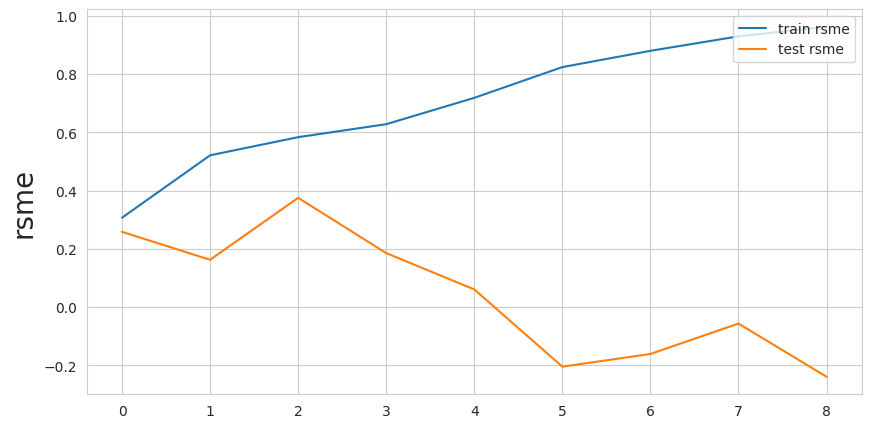

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

import numpy as np
from sklearn import metrics

from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

X = dft.drop('tip', axis=1).values
y = dft['tip'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

score_train = []
score_test = []

for d in range(1, 10):
    pipe_tips = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=d))
    pipe_tips.fit(X_train, y_train)
    
    train_prediction = pipe_tips.predict(X_train)
    test_prediction = pipe_tips.predict(X_test)
    
    train_score = r2_score(y_train, train_prediction)
    test_score = r2_score(y_test, test_prediction)
    
    #train_score.append(score_train)
    #test_score.apeend(score_test)
    
    score_train.append(train_score)
    score_test.append(test_score)
    
    
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(score_train, label="train rsme")
plt.plot(score_test, label="test rsme")
plt.legend(loc="upper right")
#plt.xlabel("max_depth", size=20)
plt.ylabel("rsme", size=20)
plt.show()